In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

# Завдання 1

Завантажте датасет за допомогою функції pandas.read_csv у змінну df. Виведіть перші 5 рядків, щоб переконатися в коректному зчитуванні даних

In [2]:
df = pd.read_csv("bikes_rent.csv")
df.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


C:\Users\user\AppData\Local\Temp\ipykernel_19800\467721921.py:16: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


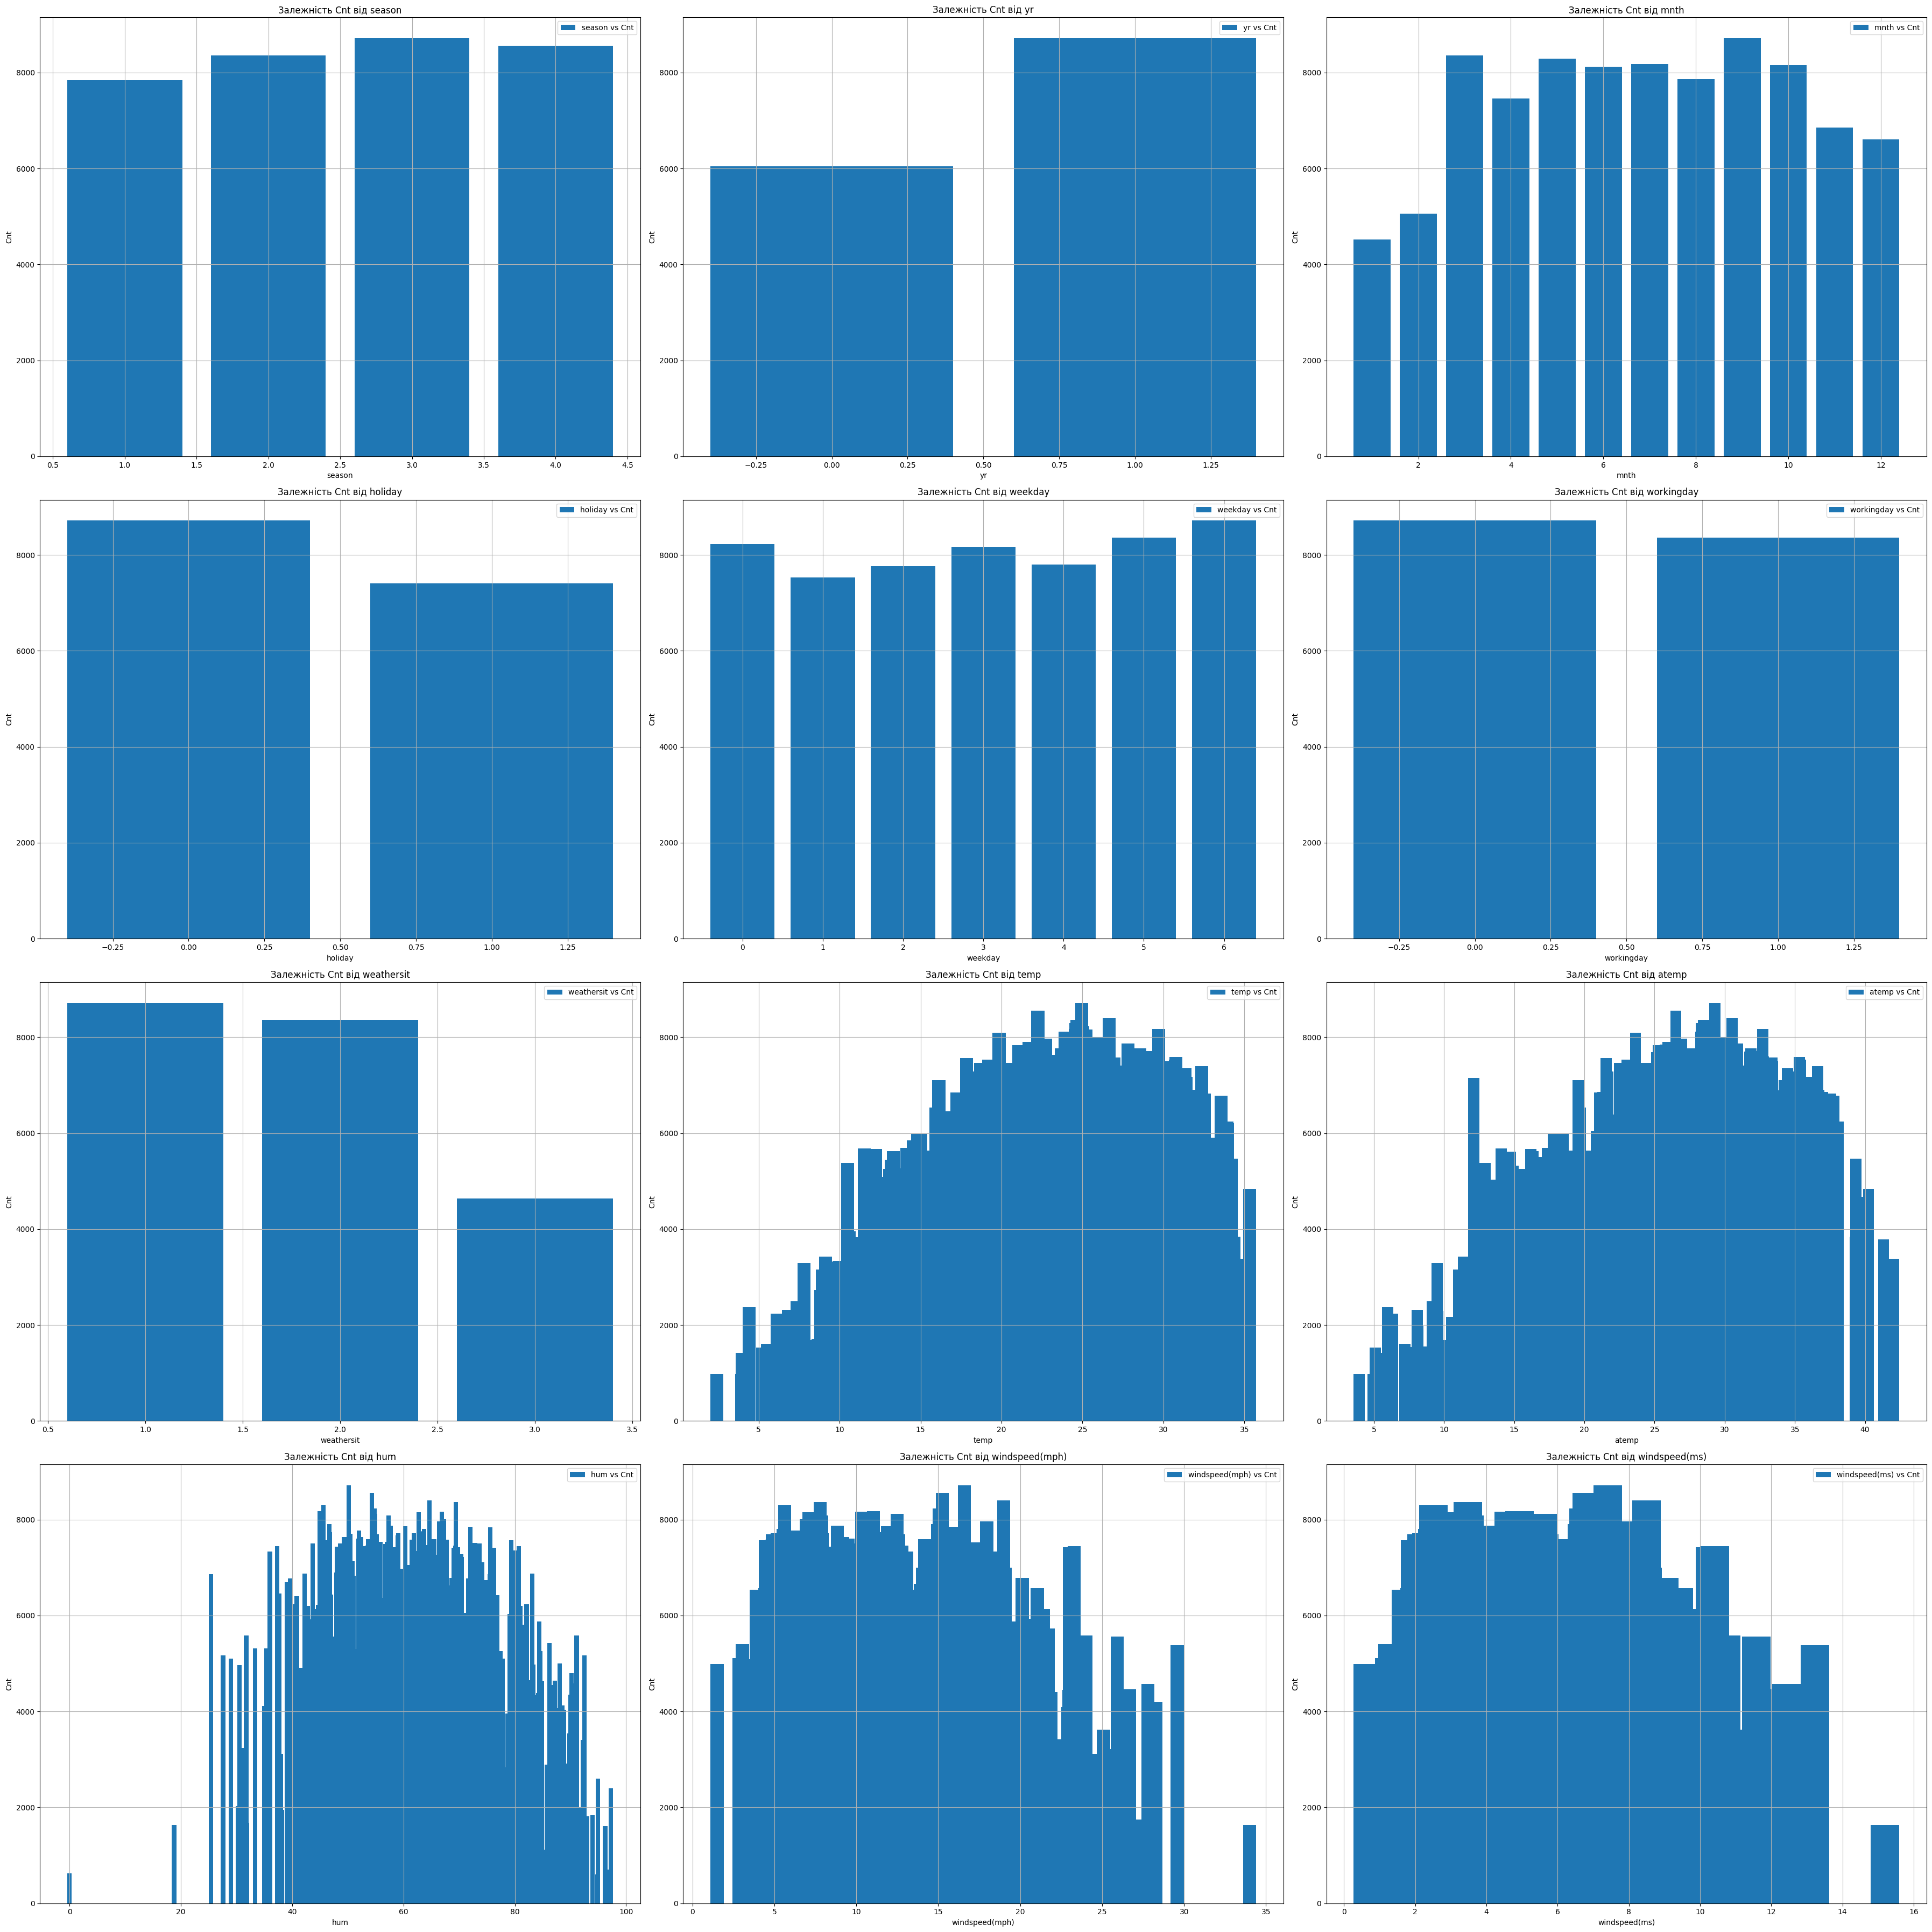

In [3]:
df_features = df.columns[:-1]
df_target = df.columns[-1]

fig, axs = plt.subplots(4, 3, figsize=(36, 36), layout='constrained')
axs = axs.flatten()

for i, feature in enumerate(df_features):
    axs[i].bar(df[feature], df['cnt'], label=f'{feature} vs Cnt')
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('Cnt')
    axs[i].set_title(f'Залежність Cnt від {feature}')
    axs[i].legend()
    axs[i].grid(True)


plt.tight_layout()
plt.show()

#   Запитання


1. Пряма зележність

2. Зміна графіку на тип scatter, виділяється 2 ознаки, від яких кількість прокатів залежить лінійно.

# Завдання 2

Порахуйте кореляції всіх ознак, окрім останньої, з останньою за допомогою методу `corrwith`.

In [4]:
matrix = df[df_features].corr()
matrix

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms)
season,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,-0.229046
yr,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,-0.011817
mnth,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,-0.207502
holiday,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.006292
weekday,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.014282
workingday,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.018796
weathersit,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,0.039511
temp,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,-0.157944
atemp,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,-0.183643
hum,0.205445,-0.110651,0.222204,-0.015937,-0.052232,0.024327,0.591045,0.126963,0.139988,1.000000,-0.248489,-0.248489


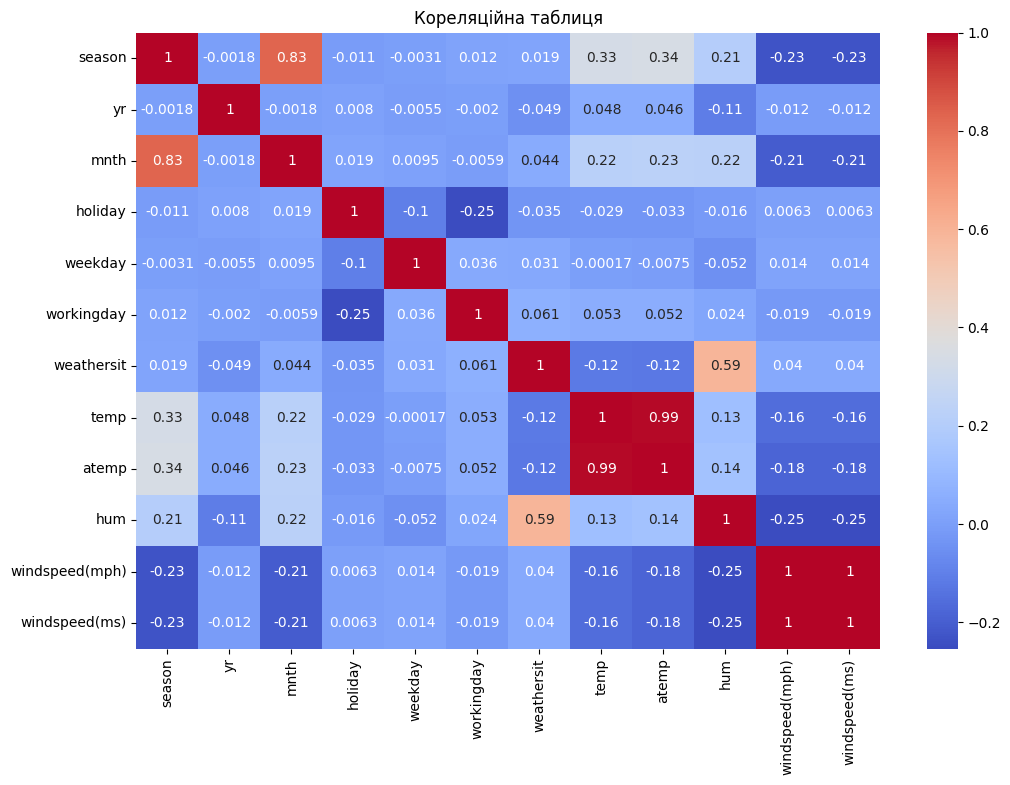

In [5]:
plt.figure(figsize=(12, 8))
sns.heatmap(matrix, annot=True, cmap='coolwarm')

plt.title('Кореляційна таблиця')
plt.show()

In [6]:
corr_target = df[df_features].corrwith(df[df_target])
corr_target

season            0.406100
yr                0.566710
mnth              0.279977
holiday          -0.068348
weekday           0.067443
workingday        0.061156
weathersit       -0.297391
temp              0.627494
atemp             0.631066
hum              -0.100659
windspeed(mph)   -0.234545
windspeed(ms)    -0.234545
dtype: float64

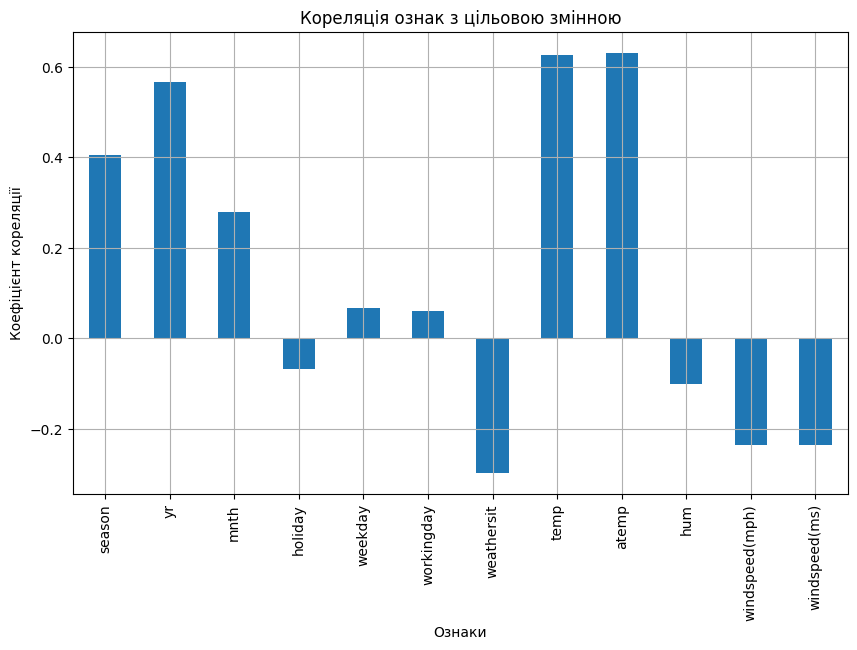

In [7]:
plt.figure(figsize=(10, 6))
corr_target.plot(kind='bar')
plt.title('Кореляція ознак з цільовою змінною')
plt.xlabel('Ознаки')
plt.ylabel('Коефіцієнт кореляції')
plt.grid(True)
plt.show()

# Завдання 3

Порахуйте попарні кореляції між ознаками temp, atemp, hum, windspeed(mph), windspeed(ms) і cnt за допомогою методу corr

In [8]:
pair_corr =["temp", "atemp", "hum","windspeed(mph)", "windspeed(ms)"]
for feature in pair_corr:
  print()
  print(df[[feature,"cnt"]].corr())


          temp       cnt
temp  1.000000  0.627494
cnt   0.627494  1.000000

          atemp       cnt
atemp  1.000000  0.631066
cnt    0.631066  1.000000

          hum       cnt
hum  1.000000 -0.100659
cnt -0.100659  1.000000

                windspeed(mph)       cnt
windspeed(mph)        1.000000 -0.234545
cnt                  -0.234545  1.000000

               windspeed(ms)       cnt
windspeed(ms)       1.000000 -0.234545
cnt                -0.234545  1.000000


# Завдання 4

In [9]:
df.mean()

season               2.496580
yr                   0.500684
mnth                 6.519836
holiday              0.028728
weekday              2.997264
workingday           0.683995
weathersit           1.395349
temp                20.310776
atemp               23.717699
hum                 62.789406
windspeed(mph)      12.762576
windspeed(ms)        5.705220
cnt               4504.348837
dtype: float64

# Проблема перша: колінеарні ознаки

Отже, у наших даних одна ознака дублює іншу, і є ще дві дуже схожі. Звичайно, ми могли б одразу видалити дублікати, але давайте подивимося, як відбувалося б навчання моделі, якби ми не помітили цю проблему.

Для початку проведемо масштабування, або стандартизацію ознак: з кожної ознаки віднімемо її середнє і поділимо на стандартне відхилення. Це можна зробити за допомогою методу scale.

Крім того, необхідно перемішати вибірку, це буде потрібно для крос-валідації.

In [10]:
from sklearn.preprocessing import scale
from sklearn.utils import shuffle

In [11]:
df_shuffled = shuffle(df, random_state=42)
X = scale(df_shuffled[df_shuffled.columns[:-1]])
y = df_shuffled["cnt"]

Давайте навчимо лінійну регресію на наших даних і подивимося на ваги ознак.

In [12]:
from sklearn.linear_model import LinearRegression

# Завдання 5


Створіть об'єкт лінійного регресора, навчіть його на всіх даних і виведіть ваги моделі (ваги зберігаються у змінній coef_ класу регресора). Можна виводити пари (назва ознаки, вага), скориставшись функцією zip, вбудованою в мову python. Назви ознак зберігаються у змінній df.columns.

In [13]:
model = LinearRegression()
model.fit(X,y)
model.coef_

array([ 5.70863642e+02,  1.02196042e+03, -1.41300633e+02, -8.67576047e+01,
        1.37227258e+02,  5.63898036e+01, -3.30227183e+02,  3.67479903e+02,
        5.85552180e+02, -1.45615523e+02,  1.24543563e+13, -1.24543563e+13])

In [14]:
for f,w in zip(df.columns, model.coef_):
  print(f"{f}: {w}")

season: 570.863641661725
yr: 1021.9604245185086
mnth: -141.3006331900142
holiday: -86.75760471139698
weekday: 137.2272583151452
workingday: 56.38980357474366
weathersit: -330.2271825899341
temp: 367.4799030832653
atemp: 585.5521797658965
hum: -145.6155228231448
windspeed(mph): 12454356291009.727
windspeed(ms): -12454356291208.188


In [15]:
model.intercept_

4504.354526943398

# Завдання 6

Давайте спробуємо навчити лінійні моделі з 
 і 
-регуляризацією, а далі порівняємо їхні ваги. Навчіть регресори Ridge і Lasso з параметрами за замовчуванням і переконайтеся, що проблема з вагами вирішилась.

Навчіть лінійну модель з 
-регуляризацією (клас Lasso) і виведіть ваги.

In [16]:
from sklearn import model_selection, datasets, linear_model, metrics

regressor_lasso = linear_model.Lasso()
regressor_lasso.fit(X,y)
print(f"regressor_lasso_score = {regressor_lasso.score(X, y)}")
print("\nLasso coef:\n")
for f, w in zip(df.columns, regressor_lasso.coef_):
   print(f"{f:10}: {w.round(4)}")
print(f"\n regressor_lasso intercept = {regressor_lasso.intercept_}")

regressor_lasso_score = 0.800239476118262

Lasso coef:

season    : 560.2416
yr        : 1019.4635
mnth      : -128.7306
holiday   : -86.1528
weekday   : 137.3479
workingday: 55.2124
weathersit: -332.3699
temp      : 376.3632
atemp     : 576.5308
hum       : -144.1292
windspeed(mph): -197.1397
windspeed(ms): -0.0

 regressor_lasso intercept = 4504.3488372093025


Навчіть лінійну модель з  L2 -регуляризацією (клас Ridge) і виведіть ваги.

In [17]:
regressor_ridge = linear_model.Ridge()
regressor_ridge.fit(X,y)
print(f"regressor_ridge score = {regressor_ridge.score(X, y)}")
print("\nRidge coef:\n")
for f, w in zip(df.columns, regressor_ridge.coef_):
   print(f"{f:10}: {w.round(4)}")
print(f"\n regressor_ridge intercept ={regressor_ridge.intercept_}")

regressor_ridge score = 0.8002417905136303

Ridge coef:

season    : 563.0646
yr        : 1018.9484
mnth      : -131.8733
holiday   : -86.7461
weekday   : 138.0051
workingday: 55.9031
weathersit: -332.3498
temp      : 386.4579
atemp     : 566.347
hum       : -145.0713
windspeed(mph): -99.2594
windspeed(ms): -99.2594

 regressor_ridge intercept =4504.3488372093025


# Завдання 7

In [18]:
alphas = np.arange(1, 500, 50)


coefs_lasso = []
coefs_ridge = []

for alpha in alphas:
    regressor_lasso.set_params(alpha=alpha)
    regressor_lasso.fit(X,y)
    coefs_lasso.append(regressor_lasso.coef_)
    print(f"{alpha=}, {coefs_lasso[-1][-1].round(5)=}")
print()
for alpha in alphas:
    regressor_ridge.set_params(alpha=alpha)
    regressor_ridge.fit(X,y)
    coefs_ridge.append(regressor_ridge.coef_)
    print(f"{alpha=}, {coefs_ridge[-1][-1].round(5)=}")

coefs_lasso = np.array(coefs_lasso)
coefs_ridge = np.array(coefs_ridge)

alpha=1, coefs_lasso[-1][-1].round(5)=-0.0
alpha=51, coefs_lasso[-1][-1].round(5)=-0.0
alpha=101, coefs_lasso[-1][-1].round(5)=-0.0
alpha=151, coefs_lasso[-1][-1].round(5)=-0.0
alpha=201, coefs_lasso[-1][-1].round(5)=-0.0
alpha=251, coefs_lasso[-1][-1].round(5)=-0.0
alpha=301, coefs_lasso[-1][-1].round(5)=-0.0
alpha=351, coefs_lasso[-1][-1].round(5)=-0.0
alpha=401, coefs_lasso[-1][-1].round(5)=-0.0
alpha=451, coefs_lasso[-1][-1].round(5)=-0.0

alpha=1, coefs_ridge[-1][-1].round(5)=-99.25944
alpha=51, coefs_ridge[-1][-1].round(5)=-101.62731
alpha=101, coefs_ridge[-1][-1].round(5)=-102.10167
alpha=151, coefs_ridge[-1][-1].round(5)=-102.00538
alpha=201, coefs_ridge[-1][-1].round(5)=-101.58638
alpha=251, coefs_ridge[-1][-1].round(5)=-100.96471
alpha=301, coefs_ridge[-1][-1].round(5)=-100.20862
alpha=351, coefs_ridge[-1][-1].round(5)=-99.36066
alpha=401, coefs_ridge[-1][-1].round(5)=-98.44906
alpha=451, coefs_ridge[-1][-1].round(5)=-97.49343


Проаналізуйте динаміку ваг при збільшенні параметра регуляризації

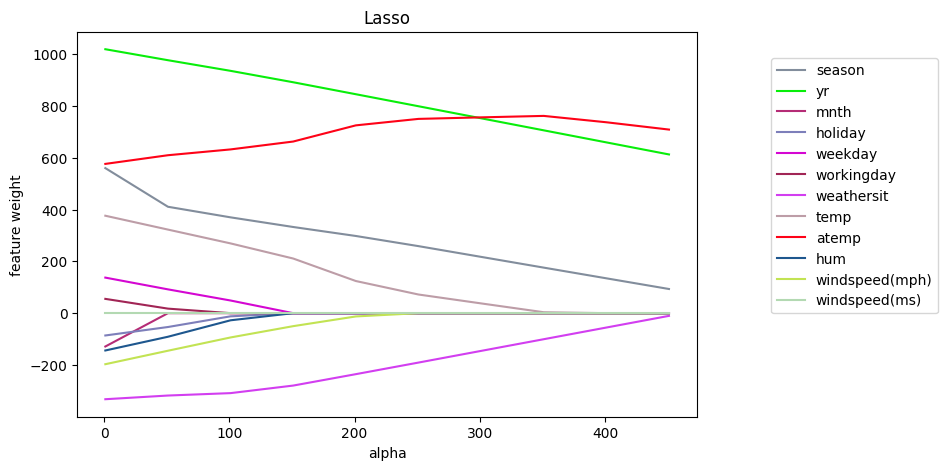

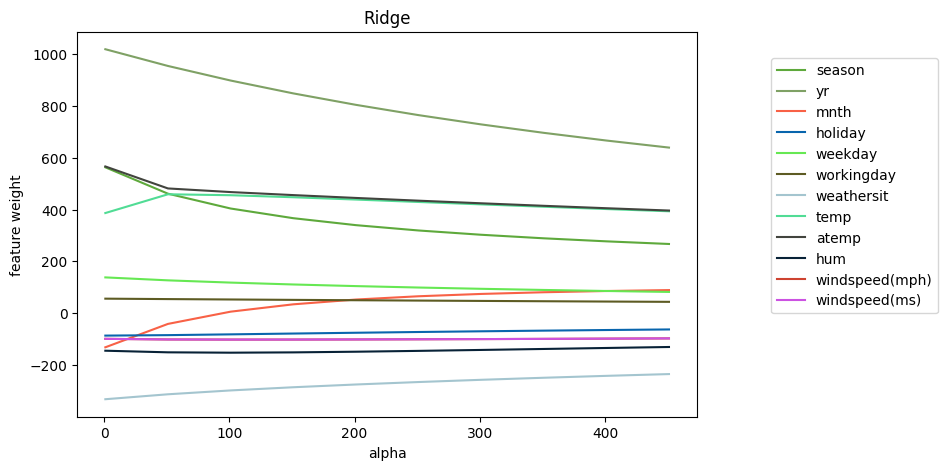

In [19]:
plt.figure(figsize=(8, 5))

for coef, feature in zip(coefs_lasso.T, df.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))

plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Lasso")

plt.figure(figsize=(8, 5))
for coef, feature in zip(coefs_ridge.T, df.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))

plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Ridge")

plt.show()

1. Lasso

2. Чим більше значення параметра alpha, тим швидше метод Lasso зануляє ваги. Модель вимушена сильніше зменшувати значення коефіцієнтів, щоб мінімізувати функцію втрат, через що багато коефіцієнтів стають рівними нулю.

3. Так, Lasso виключає одну з ознак windspeed при будь-якому значенні alpha > 0, але при використанні Ridge ваги залишаються досить малими, на відміну від повного занулення коефіцієнтів у Lasso.

4. Lasso має властивість зводити деякі ваги до точного нуля, що означає фактичне виключення відповідних ознак з моделі. Це робить його підходящим для відбору неінформативних ознак.

# Завдання 8

In [20]:
def create_plot(data, title, xlabel, ylabel, figsize=None):
    size = figsize or (15, 5)
    plt.figure(figsize=size)

    x = data[0]
    y = data[1]

    plt.plot(x, y)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.grid()
    plt.show()

[ 1  6 11 16 21 26 31 36 41 46 51 56 61 66 71 76 81 86 91 96]
[[9.60000000e+01 9.10000000e+01 8.60000000e+01 8.10000000e+01
  7.60000000e+01 7.10000000e+01 6.60000000e+01 6.10000000e+01
  5.60000000e+01 5.10000000e+01 4.60000000e+01 4.10000000e+01
  3.60000000e+01 3.10000000e+01 2.60000000e+01 2.10000000e+01
  1.60000000e+01 1.10000000e+01 6.00000000e+00 1.00000000e+00]
 [8.51990723e+05 8.46392159e+05 8.40822795e+05 8.35574342e+05
  8.30286629e+05 8.25198482e+05 8.20159702e+05 8.15491238e+05
  8.11192904e+05 8.07264703e+05 8.03575587e+05 8.00211247e+05
  7.97217570e+05 7.94594561e+05 7.92342196e+05 7.89464663e+05
  7.86750841e+05 7.83634377e+05 7.81531091e+05 7.85055147e+05]]


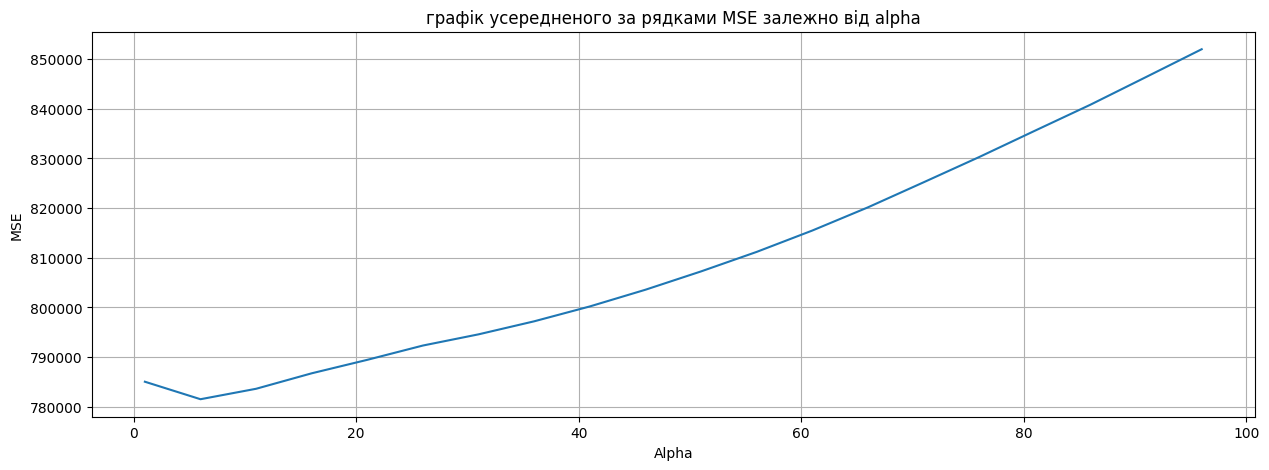

In [21]:
from sklearn.linear_model import LassoCV

alphas = np.arange(1, 100, 5)
print(alphas)

regressor = LassoCV(alphas=alphas, cv=3)
regressor.fit(X, y)
mse_values = np.mean(regressor.mse_path_, axis=1)
data = np.vstack((regressor.alphas_, mse_values))
print(data)
create_plot(data,"графік усередненого за рядками MSE залежно від alpha","Alpha","MSE")

# Завдання 9

In [22]:
print("Alphas with minimum MSE:")

min_values = np.min(regressor.mse_path_, axis=0)
print(f"{min_values=}")

min_idx = np.argmin(regressor.mse_path_, axis=0)
print(f"{min_idx=}")

alphas = []
for i, idx in enumerate(min_idx):
  mse = min_values[i]
  alpha = regressor.alphas_[idx]
  alphas.append(alpha)
  print(f"Alpha = {alpha}, MSE = {mse}")

Alphas with minimum MSE:
min_values=array([733725.76040522, 799433.16736917, 796979.89551936])
min_idx=array([18, 19,  9], dtype=int64)
Alpha = 6, MSE = 733725.7604052245
Alpha = 1, MSE = 799433.1673691699
Alpha = 51, MSE = 796979.8955193633


(20, 3)


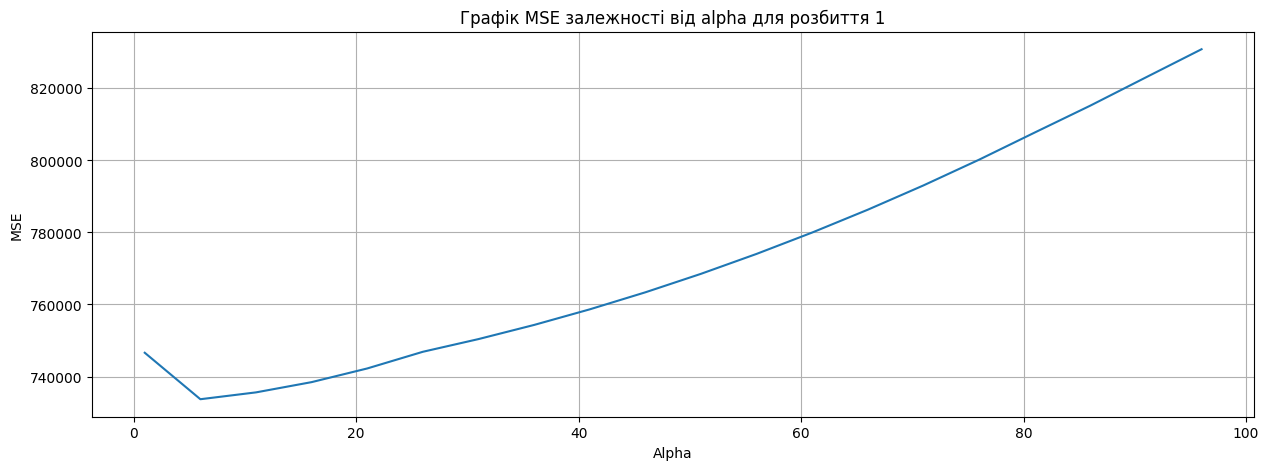

Alpha = 6, MSE = 733725.7604052245


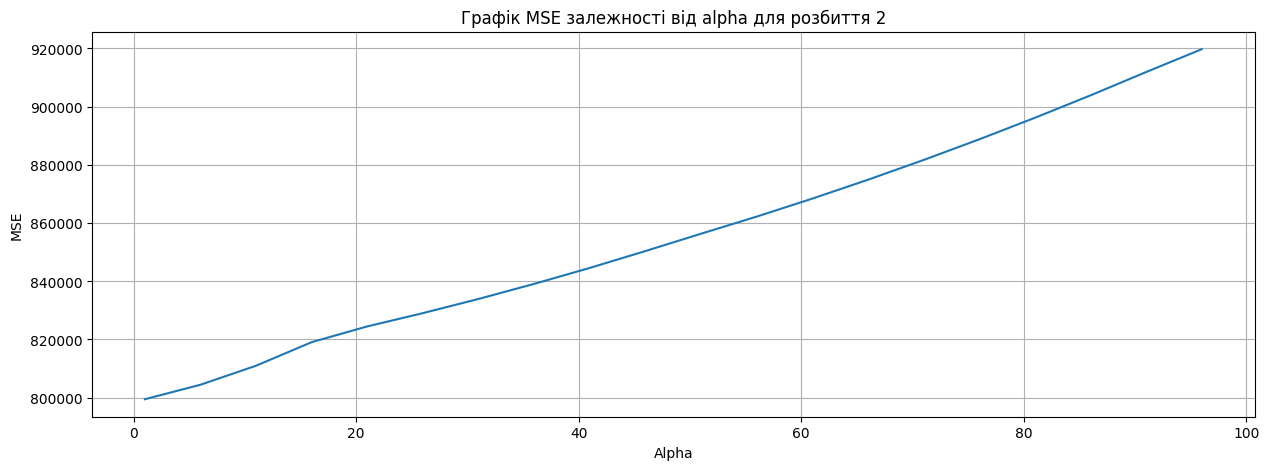

Alpha = 1, MSE = 799433.1673691699


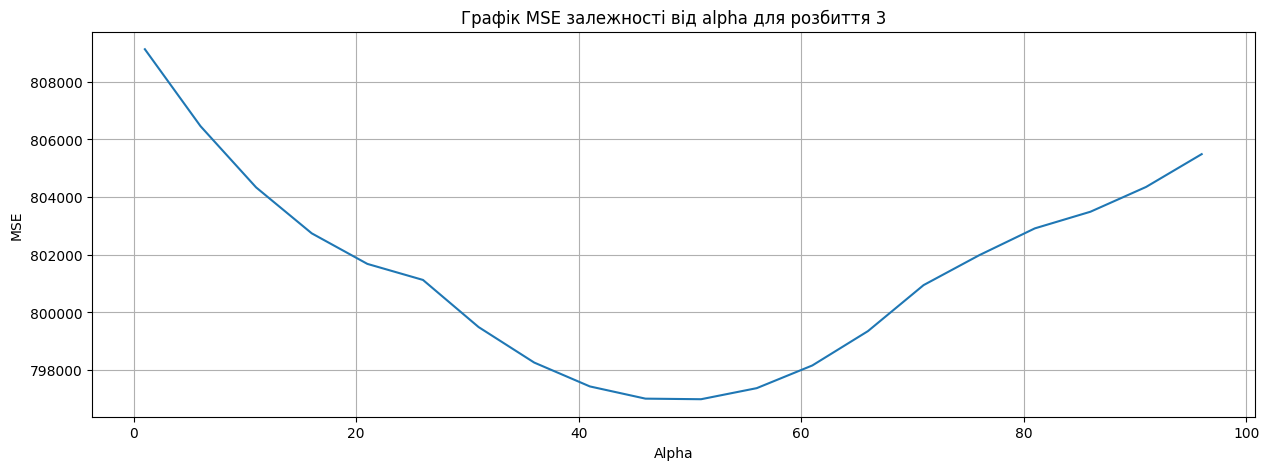

Alpha = 51, MSE = 796979.8955193633


In [23]:
print(regressor.mse_path_.shape)
for test_bloc in range(regressor.mse_path_.shape[1]):
  data = np.vstack((regressor.alphas_, regressor.mse_path_[:,test_bloc]))
  create_plot(data,f"Графік MSE залежноcті від alpha для розбиття {test_bloc+1}","Alpha","MSE")
  min_mse = np.min(regressor.mse_path_[:, test_bloc])
  min_alpha_idx = np.argmin(regressor.mse_path_[:, test_bloc])
  min_alpha = regressor.alphas_[min_alpha_idx]
  print(f"Alpha = {min_alpha}, MSE = {min_mse}")

# Завдання 10

Запитання 1
В останній навченій моделі виберіть 4 ознаки з найбільшими (позитивними) коефіцієнтами (і випишіть їх), подивіться на візуалізації залежностей cnt від цих ознак, які ми зображали у блоці "Ознайомлення з даними". Чи видно зростаючу лінійну залежність cnt від цих ознак за графіками? Чи логічно стверджувати (виходячи зі здорового глузду), що чим більше значення цих ознак, тим більше людей захочуть взяти велосипеди

In [24]:
data_coef = pd.DataFrame(regressor.coef_,index=df.columns[:-1], columns=["Weight"])
data_coef

,Weight
season,5.320190e+02
yr,1.015060e+03
mnth,-1.000395e+02
holiday,-8.329396e+01
weekday,1.325045e+02
workingday,5.155709e+01
weathersit,-3.305599e+02
temp,3.706799e+02
atemp,5.813969e+02
hum,-1.400074e+02


In [25]:
data_coef[data_coef > 0].dropna().sort_values(by=['Weight'],ascending=False).head(4)

,Weight
yr,1015.060223
atemp,581.396931
season,532.018983
temp,370.679855


Запитання 2
Виберіть 3 ознаки з найбільшими за модулем негативними коефіцієнтами (і випишіть їх), подивіться на відповідні візуалізації. Чи видно лінійну залежність, що зменшується? Чи логічно стверджувати, що чим більша величина цих ознак, тим менше людей захочуть взяти велосипеди?

In [26]:
data_coef[data_coef < 0].dropna().abs().sort_values(by=['Weight'],ascending=False).head(3)

,Weight
weathersit,330.559857
windspeed(mph),191.771408
hum,140.007406


Запитання 3
Випишіть ознаки з коефіцієнтами, близькими до нуля (< 1e-3). Як ви думаєте, чому модель виключила їх із моделі (знову подивіться на графіки)? Чи правда, що вони ніяк не впливають на попит на велосипед

In [27]:
data_coef[data_coef.abs() < 1e-03].dropna()

,Weight
windspeed(ms),-2.685470e-08
